#Genetic Algorithms (GAs)

Genetic	Algorithms	(GAs) are	the	most	widely	known	form	of	evolutionary	algorithms.	They	are	more	
complex	to	implement	than	the	local	search	heuristics	discussed	so	far,	but are	popular	due	to	their	
inspiration	in	natural	evolution.	Their	performance	can	be	improved	by	applying	local	search to	the	
individuals,	or embedding	knowledge	of	the	problem	into	the	search	operators.	However,	we	will	
implement	a	simple	GA	and	hope	that	it	will	have	better	performance	than	the	simpler	local	search	
heuristics

In [1]:
import urllib2  # the lib that handles the url stuff
import numpy as np
import pandas as pd
import random
import copy

input_data = []
url = "http://www.cs.stir.ac.uk/~goc/source/hard200.txt"
data = urllib2.urlopen(url) # it's a file like object and works just like a file
for line in data: # files are iterable
    input_data.append(map(int,line.split()))

total_items = input_data.pop(0)[0]
max_weight = input_data.pop()[0]
df = pd.DataFrame(input_data, columns=['no.', 'value', 'weight'])
df.head()

,no.,value,weight
0,1,835,735
1,2,1670,1470
2,3,3340,2940
3,4,1087,987
4,5,1087,987


In [2]:
#function to generate a binary representation of the items selected. 
def binrep(n,r):
    return "{0:0{1}b}".format(n, r)
#random.randint(1, 2**instance_number)
weights = np.array(df["weight"])   
values = np.array(df["value"])

In [11]:
#initiate popoulation size and values
pop_size = 50
genes_selected = []
while pop_size>0:
    sample_selected = np.array(map(int,binrep(random.randint(1, 2**total_items), total_items)))
    genes_selected.append(sample_selected)
    pop_size -= 1

#print genes_selected

In [12]:
#evaluate population
arr_total_weights = np.dot(genes_selected, weights)
arr_total_values = np.dot(genes_selected, values)
for idx in xrange(0,arr_total_values.size):
    if arr_total_weights[idx]>max_weight:
        arr_total_values[idx]=0

#print arr_total_values

In [13]:
def tournament_selection(arr_total_values):
    #make a deep cpoy of arr_total_value
    tmp_total = copy.deepcopy(arr_total_values).tolist()
    #randomly select individual from population pool which value is not zeo
    ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    while ind1==0:
        ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    while ind2==0:
        ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    #return better individual value
    if ind1>ind2:
        return ind1
    else:
        return ind2

#print tournament_selection(arr_total_values)

In [14]:
def crossover(mom,dad):
    cut = random.randint(0,len(mom)) #not uniformly distributed??????????????
    return np.append(mom[0:cut], dad[cut:]), np.append(dad[0:cut], mom[cut:])

In [15]:
#run genetic algorithm (GA)
generation = 500
lst_best_values = []
while generation>0:
    #select mom and dad from values population pool
    mom = tournament_selection(arr_total_values)
    dad = tournament_selection(arr_total_values)
    #select mom and dad genes that give good value fitness
    idx_mom = random.choice(np.where(arr_total_values==mom)[0])
    mom_genes = genes_selected[idx_mom]
    idx_dad = random.choice(np.where(arr_total_values==dad)[0])
    dad_genes = genes_selected[idx_dad]
    #perform crossover
    child1, child2 = crossover(mom_genes, dad_genes)
    #mutate child1
    idx = random.randint(0,len(child1)-1)
    child1[idx] = int(not child1[idx]) 
    #mutate child2
    idx = random.randint(0,len(child2)-1)
    child2[idx] = int(not child2[idx])
    #evaluate child1
    child1_weight = np.dot(child1, weights)
    child1_value = np.dot(child1, values)
    if child1_weight>max_weight:
        child1_value = 0
    #evaluate child2
    child2_weight = np.dot(child2, weights)
    child2_value = np.dot(child2, values)
    if child2_weight>max_weight:
        child2_value = 0
    #replace worst
    inds = arr_total_values.argsort()
    inds = inds[::-1]
    arr_total_values = arr_total_values[inds]
    arr_total_weights = arr_total_weights[inds]
    tmp_genes = []
    for i in inds:
        tmp_genes.append(genes_selected[i])
    genes_selected = tmp_genes
    arr_total_values = np.append(arr_total_values[0:-2],[child1_value, child2_value])
    #print [child1_value, child2_value]
    arr_total_weights = np.append(arr_total_weights[0:-2],[child1_weight, child2_weight])
    np.append(genes_selected[0:-2],[child1, child2])
    #keep record of best value found so far
    lst_best_values.append(arr_total_values[0])
    
    generation -= 1
print lst_best_values[-1]

132708


<function matplotlib.pyplot.show>

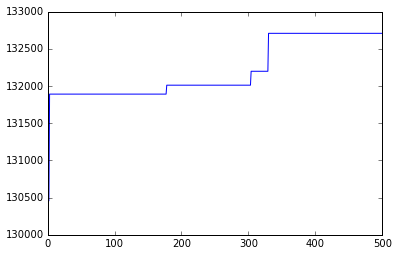

In [16]:
#best population values found so far
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(xrange(0,len(lst_best_values))), lst_best_values)
plt.show

<function matplotlib.pyplot.show>

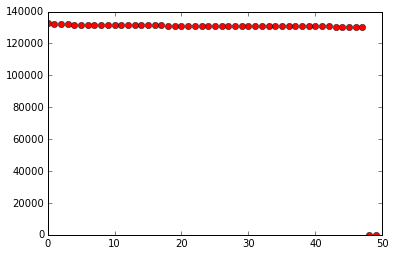

In [17]:
#last generation
plt.plot(list(xrange(0,len(arr_total_values))), arr_total_values, 'ro')
plt.show